# Problem 1: Support Vector Machines

## Instructions:
1. Please use this q1.ipynb file to complete hw5-q1 about SVMs
2. You may create new cells for discussions or visualizations


In [1]:
# Install cvxopt with pip
!pip install cvxopt

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as matrix
from cvxopt import solvers as solvers

## a): Linearly Separable Dataset

In [3]:
data = np.loadtxt('clean_lin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]

In [4]:
r,c = X.shape
y=y.reshape(-1,1)
H=np.dot(y*X,(y*X).T)
P=matrix(H)
q=matrix(np.ones((r,1))*-1)
G=matrix(np.eye(r)*-1)
h=matrix(np.zeros(r))
A=matrix(y.T)
b=matrix(np.zeros(1))

sol=solvers.qp(P,q,G,h,A,b,kktsolver = "ldl")

# Lagrange multipliers 
multipliers = np.ravel(sol['x']) 
 
# Support vectors have positive multipliers. 
has_positive_multiplier = multipliers > 1e-7 
sv_multipliers = multipliers[has_positive_multiplier] 
 
support_vectors = X[has_positive_multiplier] 
support_vectors_y = y[has_positive_multiplier] 

     pcost       dcost       gap    pres   dres
 0: -1.2293e+01 -2.8391e+01  1e+02  1e+01  2e+00
 1: -2.5419e+01 -3.4794e+01  3e+01  3e+00  5e-01
 2: -3.6313e+01 -4.5893e+01  3e+01  2e+00  4e-01
 3: -4.3790e+01 -4.5825e+01  8e+00  4e-01  7e-02
 4: -4.3706e+01 -4.3902e+01  5e-01  2e-02  4e-03
 5: -4.3700e+01 -4.3727e+01  3e-02  5e-05  8e-06
 6: -4.3721e+01 -4.3723e+01  1e-03  2e-06  4e-07
 7: -4.3723e+01 -4.3723e+01  1e-05  2e-08  4e-09
Optimal solution found.


In [5]:
alphas=np.array(sol['x'])

In [6]:
w=np.dot((y*alphas).T,X)[0]
S=(alphas>1e-5).flatten()
b=np.mean(y[S]-np.dot(X[S],w.reshape(-1,1)))

In [7]:
w

array([6.83386258, 6.38305982])

In [8]:
def compute_w(multipliers, X, y): 
    return np.sum(multipliers[i] * y[i] * X[i] 
                  for i in range(len(y)))
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y) 
w = compute_w(multipliers, X, y)

def compute_b(w, X, y): 
    return np.sum([y[i] - np.dot(w, X[i])  
                   for i in range(len(X))])/len(X) 
b = compute_b(w, support_vectors, support_vectors_y) 

C:\Users\javal\AppData\Local\Temp\ipykernel_12512\1638953417.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


In [9]:
w

array([6.83386258, 6.38305982])

Text(0.5, 1.0, 'SVM-Soft')

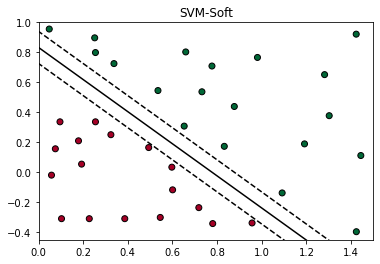

In [10]:
# plot the data
margin = 1/np.linalg.norm(w)
ax1 = plt.figure(figsize=(6,4))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                edgecolors='k')

# plot the separating hyperplaneusing w_from_sv and b
x_hyperplane = np.linspace(-0.5, 20)
y_hyperplane = - (w_from_sv[0] * x_hyperplane + b) / w_from_sv[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')
plt.xlim([0,1.5])
plt.ylim([-0.45,1])
plt.title('SVM-Soft')

## b) and c) : Linearly Non-separable Dataset

In [11]:
# Load the data set that is not linearly separable
data = np.loadtxt('dirty_nonlin.txt', delimiter='\t')
X = data[:, 0:2]
y = data[:, 2]

In [12]:
C=0.05

r,c = X.shape
y=y.reshape(-1,1)
H=np.dot(y*X,(y*X).T)
P=matrix(H)
q=matrix(-np.ones((r, 1)))
G=matrix(np.vstack((np.eye(r)*-1,np.eye(r))))
h=matrix(np.hstack((np.zeros(r), np.ones(r) * C)))
A=matrix(y.reshape(1, -1))
b=matrix(np.zeros(1))

sol=solvers.qp(P,q,G,h,A,b,kktsolver = "ldl")

# Lagrange multipliers 
multipliers = np.ravel(sol['x']) 
 
# Support vectors have positive multipliers. 
has_positive_multiplier = multipliers > 1e-7 
sv_multipliers = multipliers[has_positive_multiplier] 
 
support_vectors = X[has_positive_multiplier] 
support_vectors_y = y[has_positive_multiplier] 

     pcost       dcost       gap    pres   dres
 0: -3.0198e+01 -1.1038e+01  6e+02  3e+01  4e-14
 1: -3.0101e+00 -1.0669e+01  3e+01  8e-01  5e-14
 2: -2.1035e+00 -6.2126e+00  6e+00  1e-01  9e-15
 3: -2.0595e+00 -2.6797e+00  7e-01  1e-02  4e-15
 4: -2.1895e+00 -2.4041e+00  2e-01  3e-03  3e-15
 5: -2.2354e+00 -2.3269e+00  1e-01  1e-03  3e-15
 6: -2.2630e+00 -2.2889e+00  3e-02  2e-04  3e-15
 7: -2.2726e+00 -2.2755e+00  3e-03  2e-16  4e-15
 8: -2.2739e+00 -2.2740e+00  7e-05  2e-16  4e-15
 9: -2.2739e+00 -2.2739e+00  7e-07  4e-16  4e-15
Optimal solution found.


In [13]:
alphas=np.array(sol['x'])

In [14]:
w = compute_w(multipliers, X, y)
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y)
b = compute_b(w, support_vectors, support_vectors_y)

C:\Users\javal\AppData\Local\Temp\ipykernel_12512\1638953417.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


In [15]:
b

0.8451451751556334

In [16]:
def compute_w(multipliers, X, y): 
    return np.sum(multipliers[i] * y[i] * X[i] 
                  for i in range(len(y)))
w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y) 
w = compute_w(multipliers, X, y)

def compute_b(w, X, y): 
    return np.sum([y[i] - np.dot(w, X[i])  
                   for i in range(len(X))])/len(X) 
b = compute_b(w, support_vectors, support_vectors_y) 

C:\Users\javal\AppData\Local\Temp\ipykernel_12512\1638953417.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


In [17]:
b

0.8451451751556334

Text(0.5, 1.0, 'SVM-Soft')

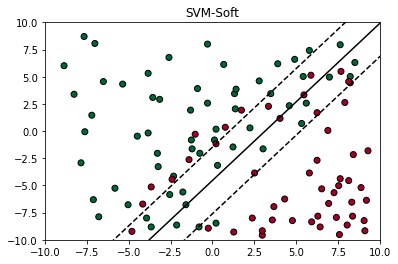

In [18]:
# plot the data
margin = 1/np.linalg.norm(w)
ax1 = plt.figure(figsize=(6,4))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                edgecolors='k')

# plot the separating hyperplaneusing w_from_sv and b
x_hyperplane = np.linspace(-20, 20)
y_hyperplane = - (w_from_sv[0] * x_hyperplane + b) / w_from_sv[1]
upper_margin = y_hyperplane + margin
lower_margin = y_hyperplane - margin
plt.plot(x_hyperplane, y_hyperplane, 'k-')
plt.plot(x_hyperplane, upper_margin, 'k--')
plt.plot(x_hyperplane, lower_margin, 'k--')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.title('SVM-Soft')

     pcost       dcost       gap    pres   dres
 0: -3.1636e+01 -2.2062e+01  7e+02  2e+01  5e-14
 1: -5.6226e+00 -2.0649e+01  5e+01  1e+00  6e-14
 2: -4.1036e+00 -1.1247e+01  1e+01  2e-01  1e-14
 3: -4.1158e+00 -5.1806e+00  1e+00  2e-02  7e-15
 4: -4.3486e+00 -4.7028e+00  4e-01  5e-03  6e-15
 5: -4.4340e+00 -4.5760e+00  2e-01  1e-03  7e-15
 6: -4.4708e+00 -4.5230e+00  5e-02  3e-04  7e-15
 7: -4.4851e+00 -4.5034e+00  2e-02  8e-05  7e-15
 8: -4.4920e+00 -4.4945e+00  3e-03  6e-06  7e-15
 9: -4.4931e+00 -4.4932e+00  3e-05  8e-08  9e-15
10: -4.4931e+00 -4.4931e+00  3e-07  8e-10  9e-15
Optimal solution found.


C:\Users\javal\AppData\Local\Temp\ipykernel_12512\1638953417.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]
C:\Users\javal\AppData\Local\Temp\ipykernel_12512\2464155431.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]
C:\Users\javal\AppData\Local\Temp\ipykernel_12512\2464155431.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


     pcost       dcost       gap    pres   dres
 0: -5.7505e+01 -2.5873e+02  1e+03  3e+00  9e-14
 1: -4.0125e+01 -1.6918e+02  2e+02  3e-01  8e-14
 2: -3.7704e+01 -5.8598e+01  2e+01  2e-02  6e-14
 3: -4.1093e+01 -5.0709e+01  1e+01  8e-03  5e-14
 4: -4.2959e+01 -4.6523e+01  4e+00  2e-03  6e-14
 5: -4.3779e+01 -4.5280e+01  2e+00  7e-04  7e-14
 6: -4.4015e+01 -4.4900e+01  9e-01  2e-04  7e-14
 7: -4.4311e+01 -4.4534e+01  2e-01  5e-05  7e-14
 8: -4.4341e+01 -4.4483e+01  1e-01  3e-05  7e-14
 9: -4.4388e+01 -4.4429e+01  4e-02  4e-16  6e-14
10: -4.4407e+01 -4.4408e+01  8e-04  4e-15  7e-14
11: -4.4407e+01 -4.4407e+01  8e-06  2e-15  6e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.8226e+03 -7.5705e+05  2e+06  6e-01  5e-12
 1: -2.4424e+03 -1.7816e+05  2e+05  1e-02  4e-12
 2: -2.6870e+03 -8.8257e+03  6e+03  3e-04  4e-12
 3: -3.5792e+03 -5.5403e+03  2e+03  8e-05  4e-12
 4: -3.8293e+03 -5.3116e+03  1e+03  5e-05  5e-12
 5: -4.0971e+03 -4.8435e+03  7e+02  2e-05  5e-1

C:\Users\javal\AppData\Local\Temp\ipykernel_12512\2464155431.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


 6: -3.7746e+07 -5.3491e+07  2e+07  5e-09  5e-08
 7: -4.0548e+07 -4.9490e+07  9e+06  2e-09  5e-08
 8: -4.2701e+07 -4.6567e+07  4e+06  2e-09  6e-08
 9: -4.3915e+07 -4.5004e+07  1e+06  3e-09  7e-08
10: -4.4016e+07 -4.4780e+07  8e+05  3e-10  6e-08
11: -4.4290e+07 -4.4418e+07  1e+05  2e-09  7e-08
12: -4.4346e+07 -4.4349e+07  3e+03  4e-09  7e-08
13: -4.4347e+07 -4.4347e+07  2e+02  2e-09  7e-08
14: -4.4347e+07 -4.4347e+07  2e+00  3e-09  7e-08
Optimal solution found.


C:\Users\javal\AppData\Local\Temp\ipykernel_12512\2464155431.py:34: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(multipliers[i] * y[i] * X[i]


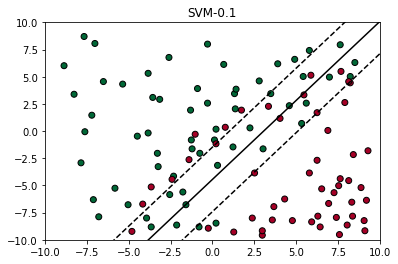

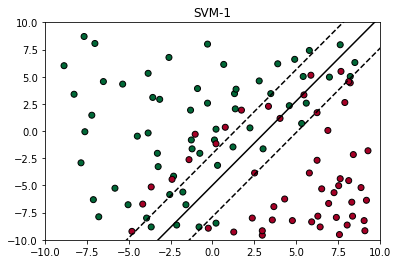

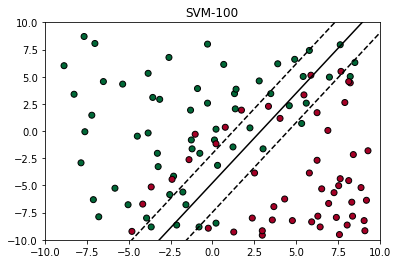

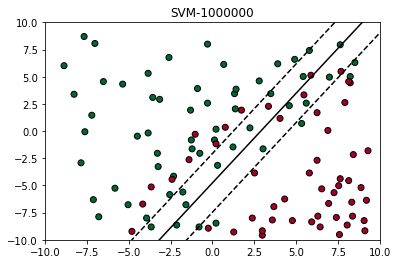

In [19]:
C_list=[0.1,1,100,1000000]

Margins=[]
for C in C_list:
    r,c = X.shape
    y=y.reshape(-1,1)
    H=np.dot(y*X,(y*X).T)
    P=matrix(H)
    q=matrix(-np.ones((r, 1)))
    G=matrix(np.vstack((np.eye(r)*-1,np.eye(r))))
    h=matrix(np.hstack((np.zeros(r), np.ones(r) * C)))
    A=matrix(y.reshape(1, -1))
    b=matrix(np.zeros(1))

    sol=solvers.qp(P,q,G,h,A,b,kktsolver = "ldl")

    # Lagrange multipliers 
    multipliers = np.ravel(sol['x']) 

    # Support vectors have positive multipliers. 
    has_positive_multiplier = multipliers > 1e-7 
    sv_multipliers = multipliers[has_positive_multiplier] 

    support_vectors = X[has_positive_multiplier] 
    support_vectors_y = y[has_positive_multiplier] 

    alphas=np.array(sol['x'])

    w = compute_w(multipliers, X, y)
    w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y)
    b = compute_b(w, support_vectors, support_vectors_y)

    def compute_w(multipliers, X, y): 
        return np.sum(multipliers[i] * y[i] * X[i] 
                      for i in range(len(y)))
    w_from_sv = compute_w(sv_multipliers, support_vectors, support_vectors_y) 
    w = compute_w(multipliers, X, y)

    def compute_b(w, X, y): 
        return np.sum([y[i] - np.dot(w, X[i])  
                       for i in range(len(X))])/len(X) 
    b = compute_b(w, support_vectors, support_vectors_y) 

    margin = 1/np.linalg.norm(w)
    Margins.append(margin)
    ax1 = plt.figure(figsize=(6,4))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlGn',
                    edgecolors='k')

    # plot the separating hyperplaneusing w_from_sv and b
    x_hyperplane = np.linspace(-20, 20)
    y_hyperplane = - (w_from_sv[0] * x_hyperplane + b) / w_from_sv[1]
    upper_margin = y_hyperplane + margin
    lower_margin = y_hyperplane - margin
    plt.plot(x_hyperplane, y_hyperplane, 'k-')
    plt.plot(x_hyperplane, upper_margin, 'k--')
    plt.plot(x_hyperplane, lower_margin, 'k--')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    plt.title(f'SVM-{C}')

In [20]:
import pandas as pd
margins=pd.DataFrame(Margins)
C_vals=pd.DataFrame(C_list)
df=pd.concat([C_vals,margins],axis=1)
df.columns=['C','Margin Width']
df

,C,Margin Width
0,0.1,2.966384
1,1.0,2.897521
2,100.0,2.699614
3,1000000.0,2.699570


### Explain your observations here:

From the table above we can see that as C increases the widht of the margin decreases. This has to do with the slack variable as adding the variable makes the boundaries narrower classifying the points better. 
